# Raport z zadania uczenie (się) ze wzmocnieniem
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [13]:
import gymnasium as gym
import pandas as pd
from experiment import experiment, visualize, plot_results

# Trening
- Algorytm jest trenowany z różnymi parametrami learning rate, discount factor, exploration probability oraz max_episode steps. 
- Liczba epizodów podczas eksperymentów to 2000, ponieważ przy większej ilości model szybko osiągał optymalny wynik niezależnie od parametrów, co uniemożliwiało wyciągnięcie wniosków.
- Ewaluacja ma miejsce co 100 epizodów treningowych i polega na wykonaniu 40 epizodów bez aktualizacji tabeli Q, zliczając przy tym sumę wszystkich nagród oraz sumę kroków potrzebnych do zakończenia epizodu, obydwa podzielone na liczbę epizodów (40). 
- Wyniki porównywane są na podstawie sumy nagród oraz średniej liczby kroków po ostatniej ewaluacji (po 2000 epizodów).
- Exploration probability posiada decay rate równy 0.8. Aktualizowana jest co 500 epizodów.

In [14]:
env = gym.make("Taxi-v3", render_mode='rgb_array').env
LEARNING_RATES = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9]
DISCOUNT_FACTORS = [0.5, 0.6, 0.7, 0.7, 0.6, 0.5]
EXPLORATION_PROBABILITY = [0.1, 0.2, 0.3, 0.3, 0.2, 0.1]
MAX_EPISODE_STEPS = [100, 100, 100, 150, 150, 150]
NUMBER_EPISODES = [2501 for _ in range(6)]
results, best_model_training, best_q_table, accuracies = experiment(env, LEARNING_RATES, DISCOUNT_FACTORS, EXPLORATION_PROBABILITY, MAX_EPISODE_STEPS, NUMBER_EPISODES)
df = pd.DataFrame(results)
df

,Number of episodes,Learning rate,Discount factor,Exploration probability,Max episode steps,Final reward,Final steps number
0,2501,0.7,0.5,0.1,100,5.850,14.625
1,2501,0.8,0.6,0.2,100,7.375,13.625
2,2501,0.9,0.7,0.3,100,8.000,13.000
3,2501,0.7,0.7,0.3,150,8.100,12.900
4,2501,0.8,0.6,0.2,150,7.850,13.150
5,2501,0.9,0.5,0.1,150,7.775,13.225


## Przebieg treningu dla wszystkich modeli

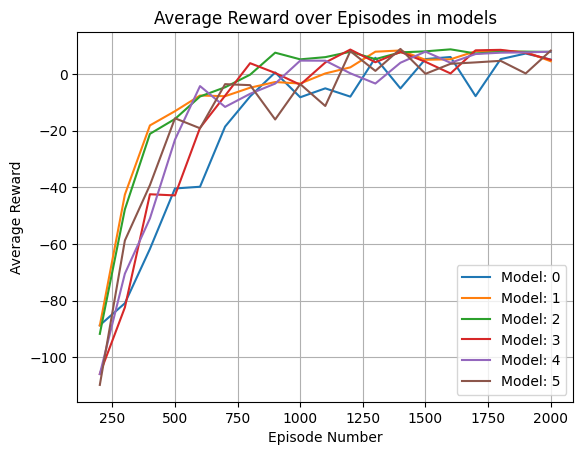

In [11]:
plot_results(accuracies)

## Wizualizacja działania algorytmu dla 5 epizodów

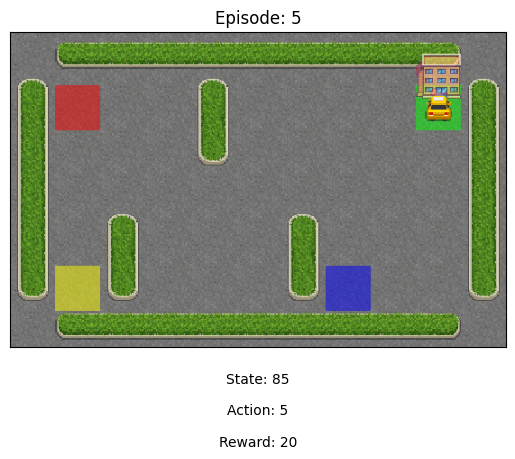

In [4]:
visualize(env, best_q_table, 5)

# Wyniki
- Najlepszy wynik został osiągnięty przez model 1 z learning rate 0.8, discount_factor 0.6, exploration probability 0.3, max episode steps 100.
- Najgorszy wynik został osiągnięty przez model 9 z learning rate 0.95, discount_factor 0.7, exploration probability 0.4, max episode steps 200.
- Wszystkie modele osiągnęły wyniki nagrody w przedziale (7.3; 8.2) oraz liczby kroków w przedziale (12.8; 13.7)
# Wnioski
- Zwiększenie prawdopodobieństwa eksploracji nie wpływało pozytywnie na wynik. Oznacza to, że w tym środowisku szybko osiągamy optymalne rozwiązanie.
- Dla zadanego środowiska algorytm osiąga najlepsze wyniki po około 3000 epizodów, następnie wyniki wahają się w granicach (7.8; 8.3). Oznacza to, że agent znalazł optymalne rozwiązanie i nie jest w stanie bardziej go ulepszyć, więc wyniki zależne są od wylosowanej pozycji startowej (-1 punkt za każdy krok).
- Algorytm działa bardzo szybko, wytrenowanie agenta dla 10000 epizodów zajmuje kilkanaście sekund.